## Author @Bramuel Aswani

In [1]:
import pandas as pd
from datetime import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Loading our sheets

In [2]:
xls = pd.ExcelFile('KPMG_VI_New_raw_data_update_final_no_header.xlsx')
df_demographic = pd.read_excel(xls, 'CustomerDemographic')
df_address = pd.read_excel(xls, 'CustomerAddress')
df_transactions = pd.read_excel(xls, 'Transactions')
df_new_customers=pd.read_excel(xls,'NewCustomerList')


C:\Users\User\AppData\Local\Temp/ipykernel_5864/1899847343.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df_demographic = pd.read_excel(xls, 'CustomerDemographic')
C:\Users\User\AppData\Local\Temp/ipykernel_5864/1899847343.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df_new_customers=pd.read_excel(xls,'NewCustomerList')


In [3]:
df_transactions.to_excel('tra.xlsx',index=False)

In [4]:

df_address.info()
df_demographic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   o

In [5]:
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


# Merge the customerDemographic and customerAddress

In [6]:
df_cust_details_all=df_demographic.merge(df_address, on='customer_id', how='left')
df_cust_details_all.reset_index(drop=True, inplace=True)

df_cust_details_all.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,9 Oakridge Court,3216.0,VIC,Australia,9.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0,4 Delaware Trail,2210.0,New South Wales,Australia,9.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0,49 Londonderry Lane,2650.0,New South Wales,Australia,4.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0,97736 7th Trail,2023.0,New South Wales,Australia,12.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0,NaN,NaN,NaN,NaN,NaN


In [7]:
df_cust_details_all.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation
count,4000.000000,4000.000000,3913.000000,3996.000000,3996.000000
mean,2000.500000,48.890000,10.657041,2985.735485,7.514014
std,1154.844867,28.715005,5.660146,844.945641,2.825426
min,1.000000,0.000000,1.000000,2000.000000,1.000000
25%,1000.750000,24.000000,6.000000,2200.000000,6.000000
50%,2000.500000,48.000000,11.000000,2768.000000,8.000000
75%,3000.250000,73.000000,15.000000,3750.000000,10.000000
max,4000.000000,99.000000,22.000000,4883.000000,12.000000


In [8]:
df_cust_details_all.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0


In [9]:
#No duplicate customer_id
df_cust_details_all['customer_id'].nunique()

4000

In [10]:
df_address['customer_id'].nunique()

3999

## Missing values

In [11]:
#we can opt to fill the missing values with mode for the categorical data and mean for the numerical data but for now lets just
#work with this
df_cust_details_all.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
address                                  4
postcode                                 4
state                                    4
country                                  4
property_valuation                       4
dtype: int64

In [12]:
df_cust_details_all.dropna(how='all',inplace=True)

In [13]:
df_cust_details_all.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
address                                  4
postcode                                 4
state                                    4
country                                  4
property_valuation                       4
dtype: int64

In [14]:
#lets confirm duplicates 
duplicate = df_cust_details_all[df_cust_details_all.duplicated()].count()
duplicate

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
default                                0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
dtype: int64

## Check consistency in commonly used attributes

In [15]:
df_cust_details_all['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [16]:
#make gender clummn have three unique values only(Female,Male,Unisex)
df_cust_details_all['gender'].replace(['F','M','Femal'],['Female','Male','Female'],inplace=True)
df_cust_details_all.gender.value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

In [17]:
df_cust_details_all['state'].value_counts()

NSW                2052
VIC                 939
QLD                 837
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [18]:
df_cust_details_all['state'].replace(['New South Wales','Victoria'],['NSW','VIC'],inplace=True)


In [19]:
df_cust_details_all['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [20]:
df_cust_details_all['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

### Change deceased_indicator values to more Understanding names

In [21]:
df_cust_details_all['deceased_indicator'].replace(['N','Y'],['NO','YES'],inplace=True)
df_cust_details_all['deceased_indicator'].head()


0    NO
1    NO
2    NO
3    NO
4    NO
Name: deceased_indicator, dtype: object


### Handling Extreme Ages 

In [22]:
df = df_cust_details_all.sort_values('DOB',ascending=True)
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,NO,NaN,No,20.0,833 Luster Way,4005.0,QLD,Australia,8.0
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,NO,1;DROP TABLE users,No,6.0,78 Glacier Hill Drive,2026.0,NSW,Australia,10.0
1091,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,NO,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0,5515 Artisan Center,3337.0,VIC,Australia,3.0
3409,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,NO,á,No,16.0,1351 Lunder Road,2049.0,NSW,Australia,10.0
2412,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,NO,á,Yes,17.0,423 Debra Terrace,3082.0,VIC,Australia,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,NO,NaN,No,NaN,3052 Green Drive,3142.0,VIC,Australia,11.0
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,NO,NaN,No,NaN,344 Dayton Drive,2148.0,NSW,Australia,9.0
3930,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,NO,NaN,Yes,NaN,22 Mifflin Junction,2096.0,NSW,Australia,9.0
3934,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,NO,NaN,Yes,NaN,3 Kedzie Center,3106.0,VIC,Australia,10.0


In [23]:
#find Years before 1915-10-30 assumming ages should not be beyond 105yrs
df_cust_details_all[df_cust_details_all['DOB']< '1915-10-30']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,NO,NaN,No,20.0,833 Luster Way,4005.0,QLD,Australia,8.0


In [24]:
#now lets replace the 1843 year with 1943 assuming error was due to typing
df_cust_details_all['DOB'].replace('1843-12-21','1943-12-21',inplace=True)

df_cust_details_all[df_cust_details_all['DOB']< '1900-10-30']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation


### dropping insignificant columns

In [25]:
# lets drop the default column because it makes no sense
df_cust_details_all.drop(columns='default',inplace=True)
df_cust_details_all.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,NO,Yes,11.0,060 Morning Avenue,2016.0,NSW,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,NO,Yes,16.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,NO,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,NO,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,NO,Yes,8.0,17979 Del Mar Point,2448.0,NSW,Australia,4.0


In [26]:
df_cust_details_all['year'] = pd.DatetimeIndex(df_cust_details_all['DOB']).year

df_cust_details_all['age']=2021-df_cust_details_all['year']

In [28]:
df_cust_details_all.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,year,age
count,4000.000000,4000.000000,3913.000000,3996.000000,3996.000000,3913.000000,3913.000000
mean,2000.500000,48.890000,10.657041,2985.735485,7.514014,1977.056223,43.943777
std,1154.844867,28.715005,5.660146,844.945641,2.825426,12.627384,12.627384
min,1.000000,0.000000,1.000000,2000.000000,1.000000,1931.000000,19.000000
25%,1000.750000,24.000000,6.000000,2200.000000,6.000000,1968.000000,34.000000
50%,2000.500000,48.000000,11.000000,2768.000000,8.000000,1977.000000,44.000000
75%,3000.250000,73.000000,15.000000,3750.000000,10.000000,1987.000000,53.000000
max,4000.000000,99.000000,22.000000,4883.000000,12.000000,2002.000000,90.000000


## Saving combined sheets to Excel

In [29]:
#lets save the merged file 
df_cust_details_all.to_excel("merged_custDemographic_and_custAdress.xlsx",index=False)


### TRANSACTIONS 

In [30]:
df_transactions.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031.0
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,39915.0
8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,33455.0
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0


In [31]:
df_transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [32]:
x=df_transactions.customer_id.nunique()
x

3494

In [33]:
import numpy as np
count=np.count_nonzero(x)
print(count)

1


### lets do value counting to ensure consistency in commonly used attributes


In [34]:
#lets do value counting to ensure consistency in commonly used attributes
#check for product_line,product_class,product_size and brand too

df_transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [35]:
df_transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [36]:
df_transactions['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [37]:
#the tasks says transactions for the past three months but we have a 12 month gap here?
print(min(df_transactions.transaction_date),max(df_transactions.transaction_date))

2017-01-01 00:00:00 2017-12-30 00:00:00


In [38]:
df_transactions.shape

(20000, 13)

In [39]:
#No duplicate Transaction_Id
x=df_transactions['transaction_id'].nunique()
x

20000

In [40]:
#customer_id is repeated in transaction which is possible, one 
x=df_transactions.groupby('customer_id')['customer_id'].nunique()
x.to_excel("x.xlsx",index=False)



In [41]:
df_transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [42]:
df_transactions.to_excel('Trans_old.xlsx')

In [43]:
#Convert online_order values to more understanding names
df_transactions['online_order'].replace([1,0],['TRUE','FALSE'],inplace=True)

In [44]:
df_transactions.sort_values('customer_id',ascending=True)


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
14485,14486,23,1,2017-03-27,FALSE,Approved,Norco Bicycles,Mountain,low,small,688.63,612.880000,33455.0
18969,18970,11,1,2017-03-29,TRUE,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.960000,35378.0
16422,16423,9,1,2017-12-09,TRUE,Approved,OHM Cycles,Road,medium,medium,742.54,667.400000,37838.0
5156,5157,47,1,2017-05-11,TRUE,Approved,Trek Bicycles,Road,low,small,1720.70,1531.420000,37823.0
13423,13424,2,1,2017-02-21,FALSE,Approved,Solex,Standard,medium,medium,71.49,53.620000,38573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,2463,2,3500,2017-04-25,FALSE,Approved,Solex,Standard,medium,medium,71.49,53.620000,41245.0
8415,8416,74,3500,2017-02-16,FALSE,Approved,WeareA2B,Standard,medium,medium,1228.07,400.910000,36668.0
8707,8708,0,5034,2017-10-07,FALSE,Approved,Solex,Road,medium,medium,416.98,312.735016,42218.0
16700,16701,0,5034,2017-01-27,FALSE,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,35667.0


In [45]:
df_new_customers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.66,0.8250,1.03125,0.876563,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.40,0.4000,0.50000,0.425000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.57,0.5700,0.57000,0.570000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.83,1.0375,1.03750,1.037500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.74,0.7400,0.92500,0.925000,4,4,1.703125


In [46]:
df_new_customers.shape

(1000, 23)

In [47]:
df_new_customers['year'] = pd.DatetimeIndex(df_new_customers['DOB']).year
df_new_customers['age']=2021-df_new_customers['year']

In [48]:
df_new_customers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,year,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.66,0.8250,1.03125,0.876563,1,1,1.718750,1957.0,64.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.40,0.4000,0.50000,0.425000,1,1,1.718750,1970.0,51.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,0.57,0.5700,0.57000,0.570000,1,1,1.718750,1974.0,47.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,0.83,1.0375,1.03750,1.037500,4,4,1.703125,1979.0,42.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.74,0.7400,0.92500,0.925000,4,4,1.703125,1965.0,56.0


In [49]:
df_new_customers.to_excel('new_cust.xlsx')

In [50]:
df_new_customers.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
year       

In [51]:
df_new_customers.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,year,age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,983.000000,983.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.749580,0.842133,0.946541,0.873603,498.819000,498.819000,0.881714,1970.793489,50.206511
std,27.796686,5.037145,848.895767,2.758804,0.203388,0.247761,0.294668,0.280658,288.810997,288.810997,0.293525,17.074268,17.074268
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000,1938.000000,19.000000
25%,26.750000,7.000000,2209.000000,6.000000,0.580000,0.630000,0.710000,0.658750,250.000000,250.000000,0.649531,1957.000000,38.000000
50%,51.000000,11.000000,2800.000000,8.000000,0.750000,0.840000,0.933750,0.858500,500.000000,500.000000,0.860000,1972.000000,49.000000
75%,72.000000,15.000000,3845.500000,9.000000,0.930000,1.030000,1.157812,1.062500,750.250000,750.250000,1.075000,1983.000000,64.000000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.703125,1.703125,1000.000000,1000.000000,1.718750,2002.000000,83.000000


# DATA EXPLORATION

### Gender Distribution

In [52]:
sns.set_style('darkgrid')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Car Ownership Distribution In Customers')

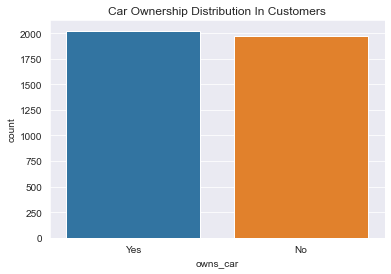

In [53]:
sns.countplot('owns_car',data=df_cust_details_all)
plt.title('Car Ownership Distribution In Customers')
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")


In [54]:
gender_counts=df_cust_details_all.gender.value_counts()
gender_counts

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

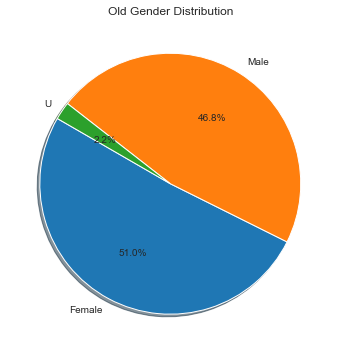

In [55]:
plt.figure(figsize=(12,6))
plt.title("Old Gender Distribution")

plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=150,shadow=True);

In [56]:
gender_counts_N=df_new_customers.gender.value_counts()

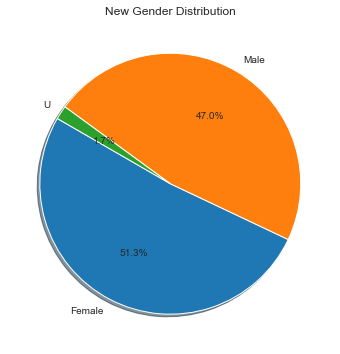

In [57]:
plt.figure(figsize=(12,6))
plt.title("New Gender Distribution")

plt.pie(gender_counts_N,labels=gender_counts.index,autopct='%1.1f%%',startangle=150,shadow=True);

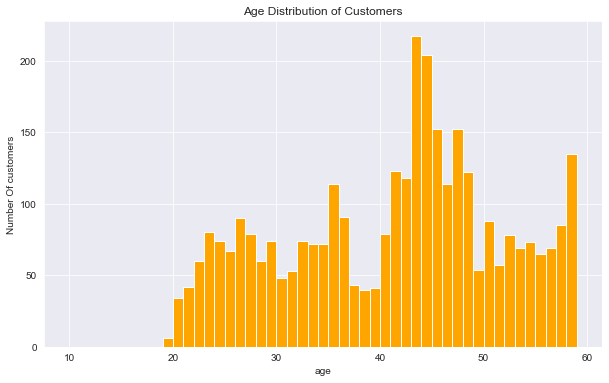

In [58]:
plt.figure(figsize=(10,6))
plt.title("Age Distribution of Customers")
plt.xlabel("age")
plt.ylabel("Number Of customers")
plt.hist(df_cust_details_all.age, bins=np.arange(10,60,1),color='orange',edgecolor="white");

No handles with labels found to put in legend.


Text(0.5, 1.0, 'OLD customers Total Bike purchases Grouped by City')

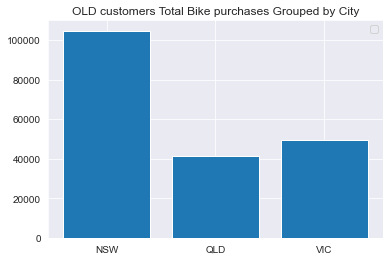

In [59]:
plt.figure(figsize=(6,4))
State_group=df_cust_details_all.groupby("state")
Bikes_purchased=State_group.sum()["past_3_years_bike_related_purchases"]
Bike=[Bike for Bike, df in State_group]
plt.bar(Bike,Bikes_purchased)
plt.legend(loc='best')
plt.title('OLD customers Total Bike purchases Grouped by City')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'New Customers Total Bike purchases Grouped by City')

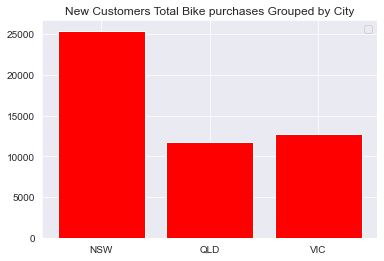

In [60]:
plt.figure(figsize=(6,4))
State_group=df_new_customers.groupby("state")
Bikes_purchased=State_group.sum()["past_3_years_bike_related_purchases"]
Bike=[Bike for Bike, df in State_group]
plt.bar(Bike,Bikes_purchased, color='red')
plt.legend(loc='best')
plt.title('New Customers Total Bike purchases Grouped by City')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'New Customers Total Bike purchases Grouped by car ownership')

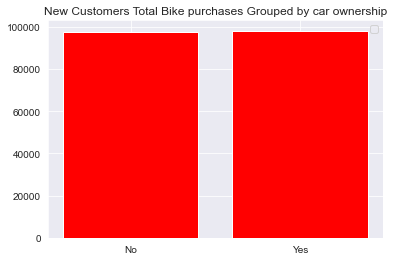

In [61]:
plt.figure(figsize=(6,4))
State_group=df_cust_details_all.groupby("owns_car")
Bikes_purchased=State_group.sum()["past_3_years_bike_related_purchases"]
Bike=[Bike for Bike, df in State_group]
plt.bar(Bike,Bikes_purchased, color='red')
plt.legend(loc='best')
plt.title('New Customers Total Bike purchases Grouped by car ownership')

## Distribution in Car Ownership state Among Customers

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


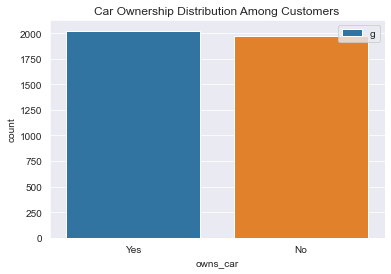

In [62]:
sns.countplot('owns_car',data=df_cust_details_all)
plt.title('Car Ownership Distribution Among Customers')
plt.legend('gender')

## Distribution in Type of Brand 

Text(0.5, 1.0, 'Tenure Distribution In Old Customers')

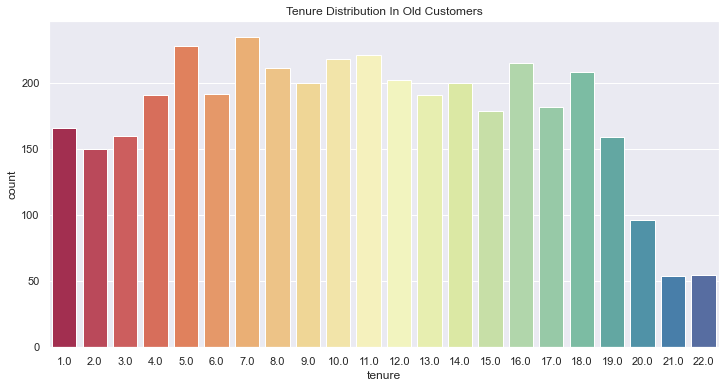

In [63]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
sns.countplot(x="tenure", data=df_cust_details_all,palette="Spectral")
plt.title("Tenure Distribution In Old Customers")

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

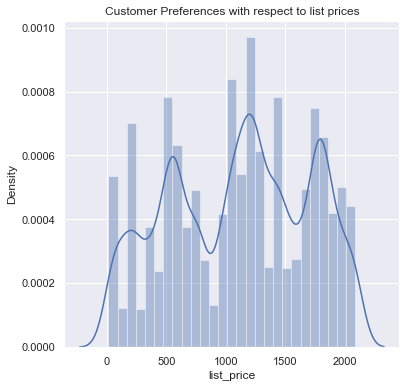

In [64]:
plt.figure(figsize=(6,6))
sns.distplot(df_transactions['list_price'])
plt.title('Customer Preferences with respect to list prices')
plt.show

No handles with labels found to put in legend.


Text(0.5, 1.0, 'OLD_Customers-Property Evaluation Grouped By Wealth_Segnment')

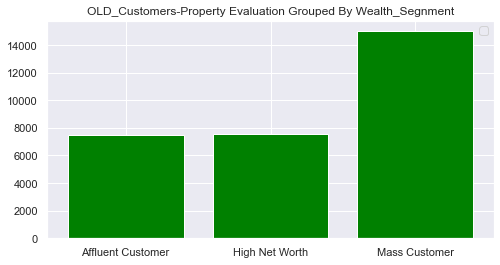

In [65]:
plt.figure(figsize=(8,4))
State_group=df_cust_details_all.groupby("wealth_segment")
Bikes_purchased=State_group.sum()['property_valuation']
Bike=[Bike for Bike, df in State_group]
plt.bar(Bike,Bikes_purchased, color='green')
plt.legend(loc='best')
plt.title('OLD_Customers-Property Evaluation Grouped By Wealth_Segnment')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

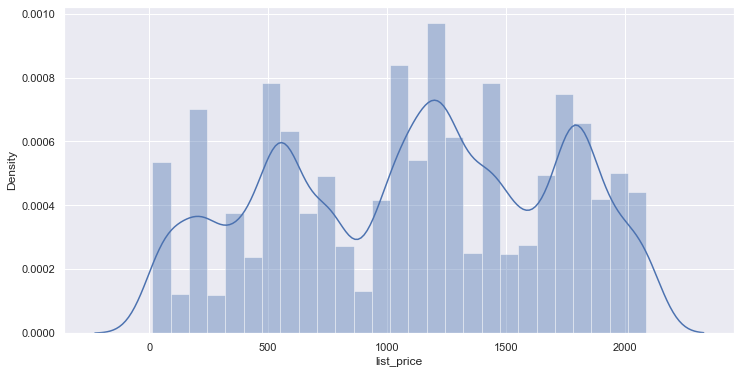

In [66]:
plt.figure(figsize=(12,6))
sns.distplot(df_transactions['list_price'])
plt.show

Text(0.5, 1.0, 'List_price vs standard_cost in Transaction ')

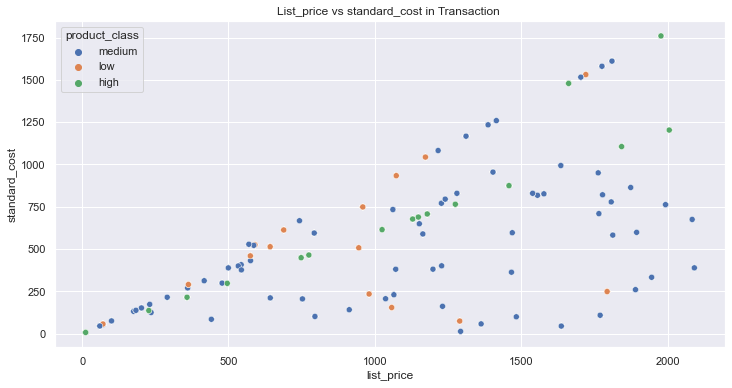

In [67]:
plt.figure(figsize=(12,6))
axis=sns.scatterplot(x="list_price",y="standard_cost",data=df_transactions,hue="product_class")
plt.title("List_price vs standard_cost in Transaction ")

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Product Size Distribution Among Customers')

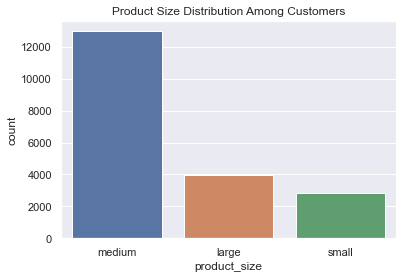

In [68]:
sns.countplot('product_size',data=df_transactions)
plt.title('Product Size Distribution Among Customers')


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Product Class Distribution Among Customers')

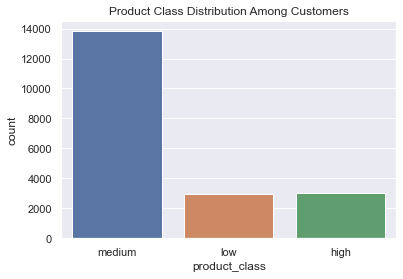

In [69]:
sns.countplot('product_class',data=df_transactions)
plt.title('Product Class Distribution Among Customers')


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender Ditribution State Wise')

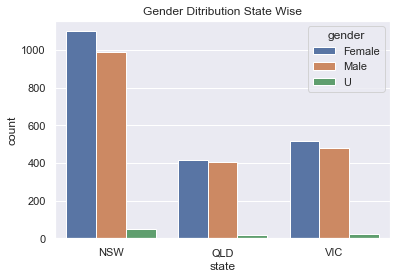

In [70]:
sns.countplot('state',hue='gender',data=df_cust_details_all)
plt.title('Gender Ditribution State Wise')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Product Line Distribution Among Customers')

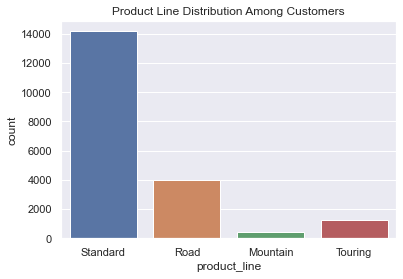

In [71]:
sns.countplot('product_line',data=df_transactions)
plt.title('Product Line Distribution Among Customers')


Text(0.5, 1.0, 'Customer Numbers With Respect to Their Job_industry')

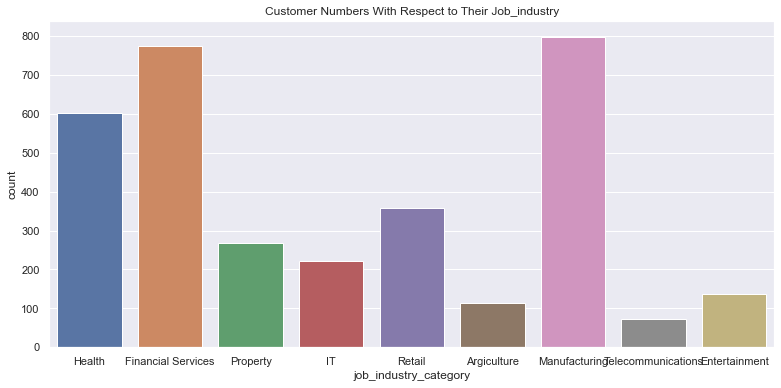

In [72]:
plt.figure(figsize=(13,6))
sns.countplot(x='job_industry_category',data=df_cust_details_all)
plt.title('Customer Numbers With Respect to Their Job_industry')

Text(0.5, 1.0, 'New Customer Numbers With Respect to Their Job_industry')

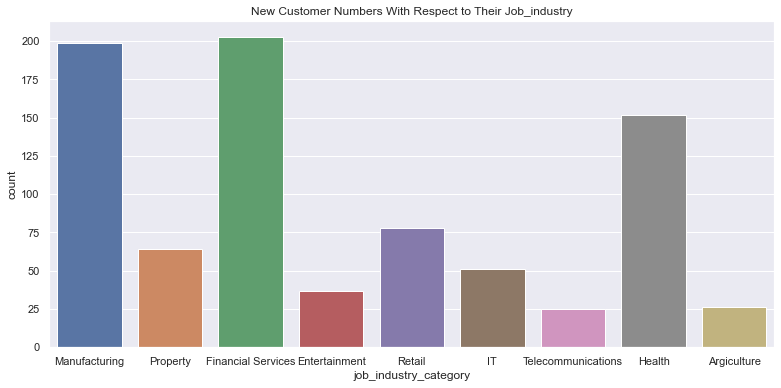

In [73]:
plt.figure(figsize=(13,6))
sns.countplot(x='job_industry_category',data=df_new_customers)
plt.title('New Customer Numbers With Respect to Their Job_industry')

Text(0.5, 1.0, 'Property Valuation In Customers')

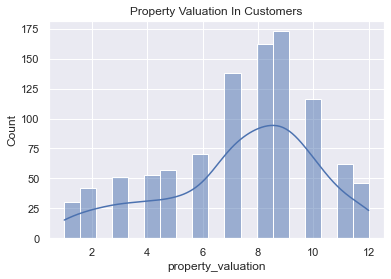

In [74]:
#metrics = df_cust_details_all['property_evaluation'].to_list()

sns.histplot(df_new_customers['property_valuation'], kde=True)
plt.title('Property Valuation In Customers')
